# Chapter 6 - Exercise 2
### Author: *John Benedick Estrada*
---
**Exercise:** Many named patterns are available in portable file formats. Modify `Life.py` to parse one of these formats and initialize the grid.

In [1]:
from Cell2D import Cell2D
from scipy.signal import correlate2d
import numpy as np

##### Implementation of Conway's Game of Life
Source: https://github.com/AllenDowney/ThinkComplexity2/blob/master/notebooks/chap06.ipynb (Cell 2)

In [2]:
class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

##### Parser for GoL portable formats

In [3]:
def parse_GoL(raw_str):
    IN_ALIVE_CELL = "O"
    IN_DEAD_CELL = "."
    OUT_ALIVE_CELL = "1"
    OUT_DEAD_CELL = "0"
    COMMENT = "!"

    board = []
    str_by_lines = raw_str.split("\n")
    
    for line in str_by_lines:
        board.append("")
        for char in line:
            # Ignore white spaces.
            if char.isspace():
                continue
            # Ignore the remaining characters in the line as they are commented out.
            elif char == COMMENT:
                if len(board[-1]) == 0:
                    board.pop()
                break
            elif char == IN_ALIVE_CELL:
                board[-1] += OUT_ALIVE_CELL
            elif char == IN_DEAD_CELL:
                board[-1] += OUT_DEAD_CELL
            else:
                raise ValueError(f"'{char}' is an invalid character.")
    return board


def make_life(n, m, row, col, str_input):
    life = Life(n, m)
    life.add_cells(row, col, *parse_GoL(str_input))
    return life

### Demo

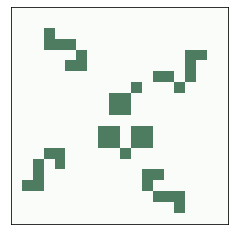

In [4]:
pattern_35P52 = """
!Name: 35P52
!With a minimum population of 35 cells it is the smallest period 52
!oscillator.
!www.conwaylife.com/wiki/index.php?title=35P52
..O
..OOO
.....O.........OO
....OO.........O
.............O.O
........OO...OO
.......O
......O
.......O.O
.......O

..OO
.O.O
.O.........OO
OO.........O
............OOO
..............O
"""

pattern_35P52_life = make_life(20, 20, 1, 1, pattern_35P52)
pattern_35P52_life.draw()
pattern_35P52_life.animate(100)